In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalize the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [ ]:
# Build the CNN model
model = models.Sequential()

In [ ]:
# Input layer and first Conv2D layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# First MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# First Dropout layer
model.add(layers.Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second Conv2D layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Second MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Second Dropout layer
model.add(layers.Dropout(0.3))

In [ ]:
# Third Conv2D layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Flatten layer
model.add(layers.Flatten())

In [ ]:
# First Dense layer
model.add(layers.Dense(64, activation='relu'))
# Third Dropout layer
model.add(layers.Dropout(0.3))
# Output layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model and store the history
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.7868 - loss: 0.6419 - val_accuracy: 0.9830 - val_loss: 0.0579
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9680 - loss: 0.1044 - val_accuracy: 0.9877 - val_loss: 0.0375
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9773 - loss: 0.0756 - val_accuracy: 0.9867 - val_loss: 0.0385
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9827 - loss: 0.0561 - val_accuracy: 0.9913 - val_loss: 0.0279
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9918 - val_loss: 0.0305
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9856 - loss: 0.0451 - val_accuracy: 0.9923 - val_loss: 0.0284
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9880 - loss: 0.0382 - val_accuracy: 0.9917 - val_loss: 0.0240
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9898 - loss: 0.0353 - 

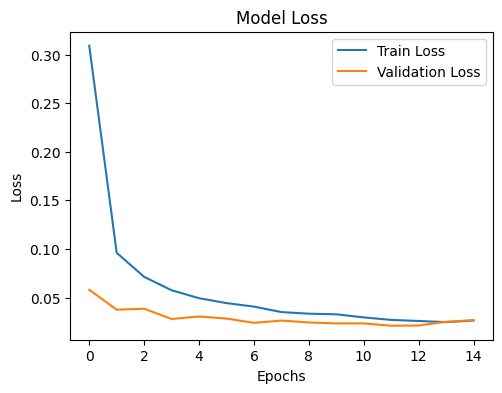

In [ ]:
# Plotting the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

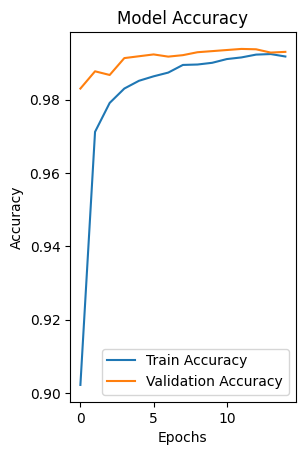

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Generate predictions for confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


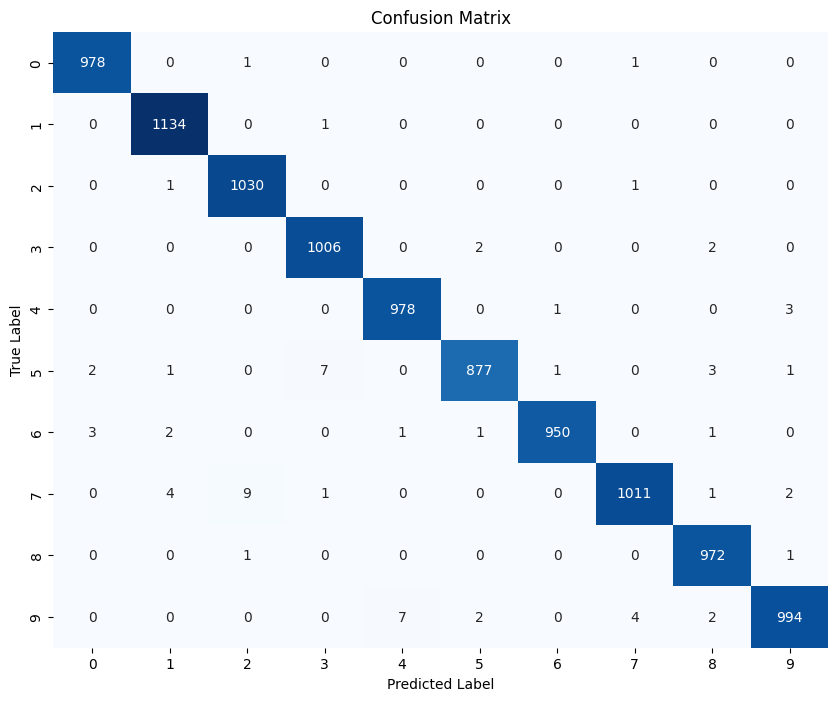

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Get the final training and validation accuracy and loss after the last epoch
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

# Calculate error rates (Error Rate = 1 - Accuracy)
train_error_rate = 1 - train_accuracy
val_error_rate = 1 - val_accuracy

# Print out the results as described in the paper
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Train Error Rate: {train_error_rate * 100:.2f}%")
print(f"Validation Error Rate: {val_error_rate * 100:.2f}%")
print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Train Accuracy: 99.17%
Validation Accuracy: 99.30%
Train Error Rate: 0.83%
Validation Error Rate: 0.70%
Train Loss: 0.0264
Validation Loss: 0.0267
